In [44]:
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### 다항분포 나이브베이즈 모형

In [2]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
# 0이라는 주사위에서 4세트, 1이라는 주사위에서6세트 던짐

In [2]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [3]:
model_mult.classes_

array([0, 1])

In [4]:
model_mult.class_count_

array([4., 6.])

In [5]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

```
다음으로 각 클래스에 대한 가능도 확률분포를 구한다. 
다항분포 모형을 사용하므로 각 클래스틑 4개의 면을 가진 주사위로 생각할 수 있다. 
그리고 각 면이 나올 확률은 각 면이 나온 횟수를 주사위를 던진 전체 횟수로 나누면 된다. 
우선 각 클래스 별로 각각의 면이 나온 횟수는 다음과 같다.
```

In [9]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [10]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [11]:
# 스무딩 되었다는걸 알 수 있음
model_mult.alpha

1.0

In [13]:
# 손으로 스무딩 해본 결과
(fc + model_mult.alpha) / \
    (np.repeat(fc.sum(axis=1)[:, np.newaxis],
               4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [15]:
# 손으로 스무딩 한값과 feature_log_prob_값과 동일
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

```
이제 이 값을 사용하여 예측을 해 보자. 
만약 어떤 메일에 1번부터 4번까지의 키워드가 각각 10번씩 나왔다면 다음처럼 확률을 구할 수 있다. 
구해진 확률로부터 이 메일이 스팸임을 알 수 있다.
```

In [16]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [18]:
# 직접 구하는 방법
p = (theta ** x_new).prod(axis=1)*np.exp(model_mult.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])

```
MNIST 숫자 분류문제를 다항분포 나이브베이즈 모형을 사용하여 풀고 
이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교하라.
```

In [16]:
from sklearn.datasets import load_digits
digits=load_digits()

In [21]:
x=digits.data
y=digits.target

In [23]:
model_mult = MultinomialNB().fit(x, y)

In [25]:
y_pred=model_mult.predict(x)

In [26]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



#### 연습문제4
```
텍스트 분석에서 TF-IDF 인코딩을 하면 단어의 빈도수가 정수가 아닌 실수값이 된다. 
이런 경우에도 다항분포 모형을 적용할 수 있는가?
```

```
count가 아닌 sum으로 동작하기 때문에 적용가능하다
이건 베르누이나이브베이즈에서도 마찬가지
정수건 실수이건 가우시안, 베르누이, 멀티 다 오류없이 돌아가나
맞는 모형을 쓰지 않으면 결과가 안좋음
```

### 뉴스그룹 분류

In [15]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])
model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()),
])
model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('model', MultinomialNB()),
])
model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english",
                             token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
    ('model', MultinomialNB()),
])

In [29]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i + 1, np.mean(scores)))

Model1: Mean score: 0.855
Model2: Mean score: 0.856
Model3: Mean score: 0.883
Model4: Mean score: 0.888
Wall time: 6min 25s


#### 연습 문제 5
```
(1) 만약 독립변수로 실수 변수, 0 또는 1 값을 가지는 변수, 자연수 값을 가지는 변수가 섞여있다면 
    사이킷런에서 제공하는 나이브베이즈 클래스를 사용하여 풀 수 있는가?

(2) 사이킷런에서 제공하는 분류문제 예제 중 숲의 수종을 예측하는 covtype 분류문제는 
    연속확률분포 특징과 베르누이확률분포 특징이 섞여있다. 이 문제를 사이킷런에서 제공하는 나이브베이즈 클래스를 사용하여 풀어라.
```

### 감성 분석
```
나이브 베이즈 분류 모형을 이용하여 문서에 대한 감성 분석(sentiment analysis)를 해보자. 감성 분석이란 문서에 대해 좋다(positive) 혹은 나쁘다(negative)는 평가를 내리는 것을 말한다.
주식에서 어떤 뉴스가 좋은 소식인지 나쁜소식인지 판단하는데에도 쓰임
```

In [23]:
# 유니코드로 인코딩하며 읽기 위해 codecs 패키지를 사용
# 파일이 큰경우 사용하면 좋음, 일부씩 읽어서 디코딩을 해줌
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외

In [24]:
# pprint 예쁘게 줄맞춰서 프린트해줌
# 맨끝에 0은 부정적 평가라는 의미 ->누군가가 다 해놓은것
from pprint import pprint
pprint(data[0])

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']


In [25]:
X = list(zip(*data))[1]
y = np.array(list(zip(*data))[2], dtype=int)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB()),
])

In [30]:
%%time
model1.fit(X, y)

Wall time: 8.12 s


Pipeline(steps=[('vect', CountVectorizer()), ('mb', MultinomialNB())])

In [27]:
# 테스트 데이터 읽어들이기
import codecs
with codecs.open("ratings_test.txt", encoding='utf-8') as f:
    data_test = [line.split('\t') for line in f.read().splitlines()]
    data_test = data_test[1:]   # header 제외

In [29]:
X_test = list(zip(*data_test))[1]
y_test = np.array(list(zip(*data_test))[2], dtype=int)

In [31]:
print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     24827
           1       0.84      0.81      0.82     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000



#### 연습 문제 1
위에서 만든 감성분석 모형에 다양한 문장을 넣어서 결과를 테스트해보자.

In [9]:
model1.predict(["짜증나네"])

array([0])

In [10]:
model1.predict(["감동이다."])

array([1])

In [12]:
# 1이 나와야하는데 0이나옴 
model1.predict(["돈이 아깝지 않다."])

array([0])

In [13]:
model1.predict(["돈 아깝다."])

array([0])

In [ ]:
model1.predict(["굿"])

### 이 결과를 Tfidf 방법을 사용했을 때와 비교해 보자.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('mb', MultinomialNB()),
])

In [25]:
%%time
model2.fit(X, y)

Wall time: 7.6 s


Pipeline(steps=[('vect', TfidfVectorizer()), ('mb', MultinomialNB())])

In [16]:
# 결과가 별 차이가 없음
# Tfidf를 쓴것은 효과가 없음
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     24827
           1       0.84      0.81      0.83     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000



### 이번에는 형태소 분석기를 사용한 결과와 비교한다.

In [10]:
from konlpy.tag import Okt
pos_tagger = Okt()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc)]

In [13]:
model3 = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize_pos)),
    ('mb', MultinomialNB()),
])

In [32]:
%%time
model3.fit(X, y)
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     24827
           1       0.84      0.81      0.83     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000

Wall time: 11.3 s


In [33]:
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     24827
           1       0.84      0.81      0.83     25173

    accuracy                           0.83     50000
   macro avg       0.83      0.83      0.83     50000
weighted avg       0.83      0.83      0.83     50000



### (1,2)-gram (바이그램) 을 사용하면 성능이 더 개선되는 것을 볼 수 있다.

모델 4는 안돌아가네...

In [36]:
model4 = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1, 2))),
    ('mb', MultinomialNB()),
])

In [40]:
%%time
model4.fit(X, y)

In [39]:
print(classification_report(y_test, model4.predict(X_test)))

### 8.1 의사결정나무
```
의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있다.
```

```
의사결정나무에 전체 트레이닝 데이터를 모두 적용해 보면 각 데이터는 특정한 노드를 타고 내려가게 된다.
각 노드는 그 노드를 선택한 데이터 집합을 가진다. 
이 때 노드에 속한 데이터의 클래스의 비율을 구하여 이를 그 노드의 조건부 확률 분포  P(Y=k|X)node 라고 정의한다.
```

#### 분류규칙을 정하는 방법
```
분류 규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립 변수와 기준값을 찾는 것이다.
```

#### 정보획득량
```
정보획득량(information gain)는  X 라는 조건에 의해 확률 변수  Y 의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다. 
다음처럼  Y 의 엔트로피에서  X 에 대한  Y 의 조건부 엔트로피를 뺀 값으로 정의된다.
```

### Scikit-Learn의 의사결정나무 클래스

In [41]:
from sklearn.datasets import load_iris
# 꽃잎의 길이와 폭을 변수로 씀
data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier
# entropy로 기준값을 설정 -> 디폴트는 지니계수
# 최대 깊이 1
# threshold를 랜덤하게 정해봄 하나하나 다 구분해보지않음
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [42]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

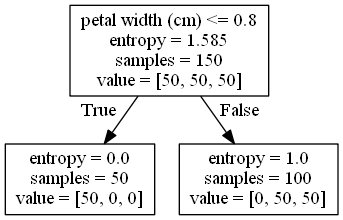

In [43]:
draw_decision_tree(tree1)

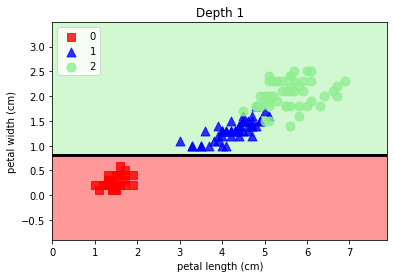

In [44]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

In [46]:
# max_depth=2로
tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)

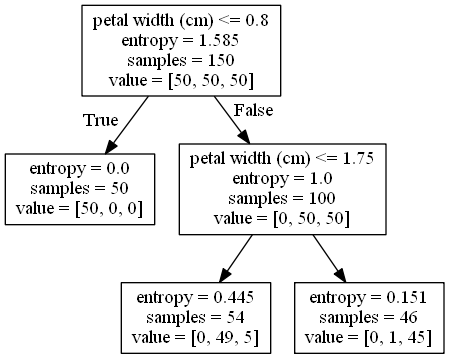

In [47]:
draw_decision_tree(tree2)

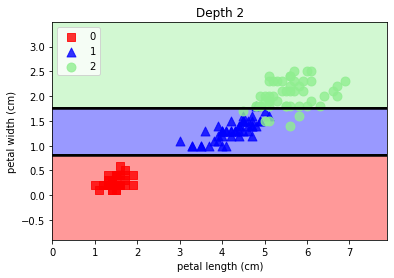

In [48]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [49]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [50]:
# max_depth=3으로
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

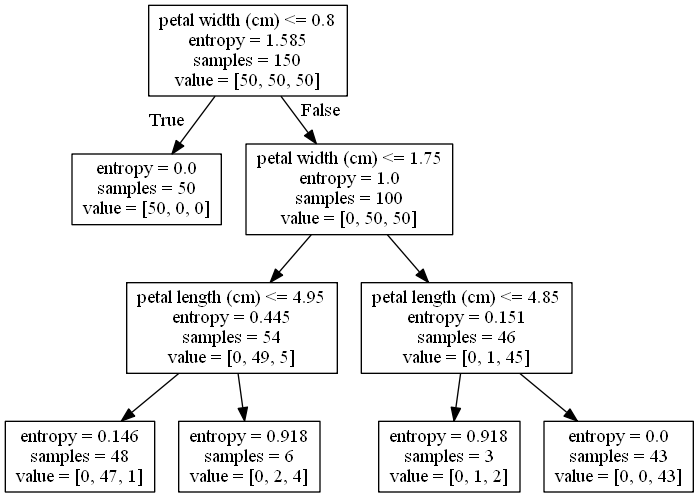

In [51]:
draw_decision_tree(tree3)

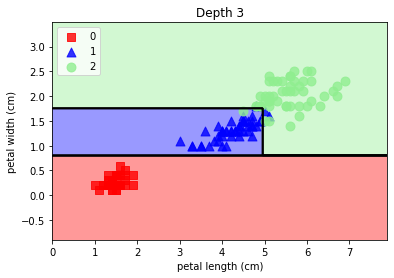

In [52]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [53]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [54]:
# max_dpth=4
# 데이터 개수가 너무 적어도 가지를 더 내리지 않음
tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

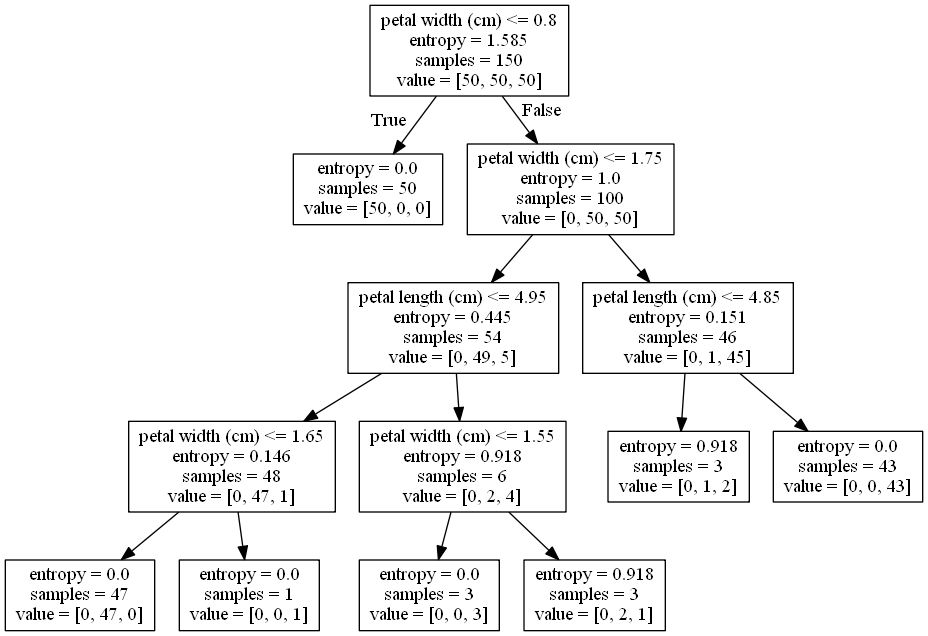

In [55]:
draw_decision_tree(tree4)

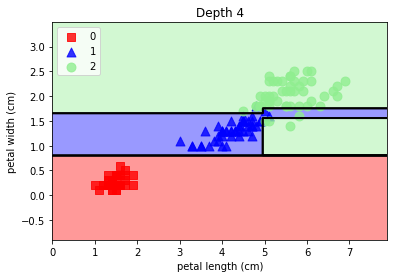

In [56]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [57]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

In [58]:
tree5 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=0).fit(X, y)

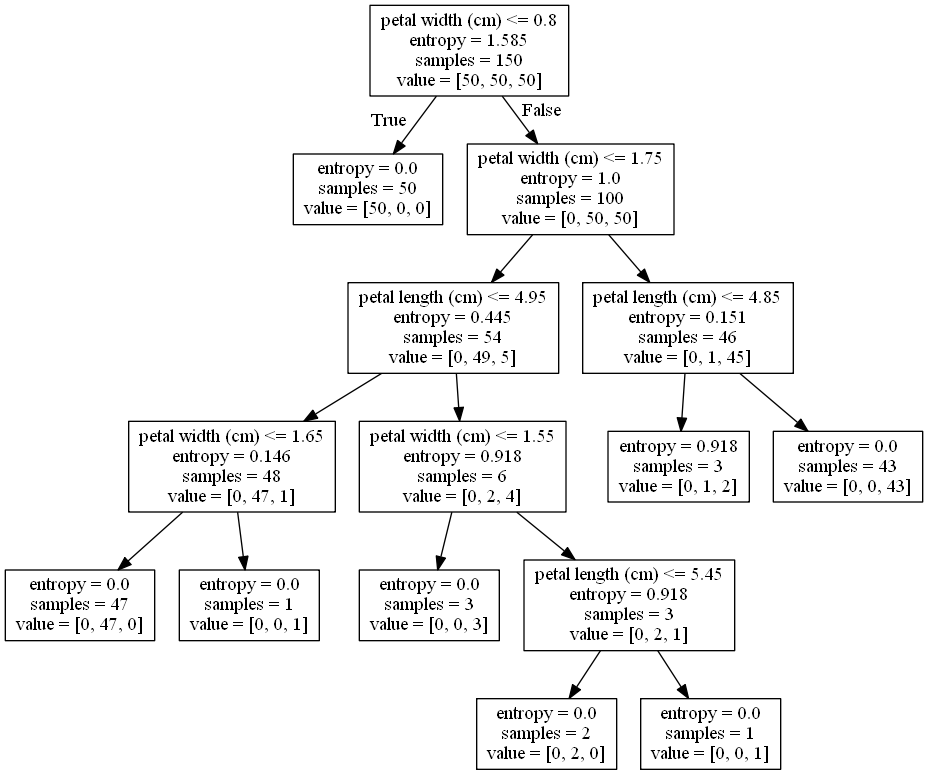

In [59]:
draw_decision_tree(tree5)

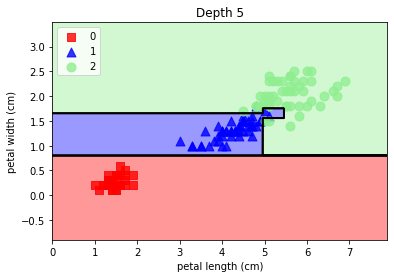

In [60]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [61]:
# 하나빼고 다 제대로 분류됨
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

#### 연습 문제 1
```
1. 붓꽃 분류 문제에서 꽃받침의 길이와 폭(sepal length, sepal width)을 사용하여 max_depth=3인 의사결정나무 모형을 만들고 정확도(accuracy)를 계산하라.
2. K=5 인 교차 검증을 통해 테스트 성능 평균을 측정하라.
3. max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.
```

In [62]:
from sklearn.datasets import load_iris
# 꽃잎의 길이와 폭을 변수로 씀
data = load_iris()
y = data.target
X = data.data[:, :2]
feature_names = data.feature_names[:2]

In [65]:
from sklearn.tree import DecisionTreeClassifier
# entropy로 기준값을 설정 -> 디폴트는 지니계수
# 최대 깊이 1
# threshold를 랜덤하게 정해봄 하나하나 다 구분해보지않음
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

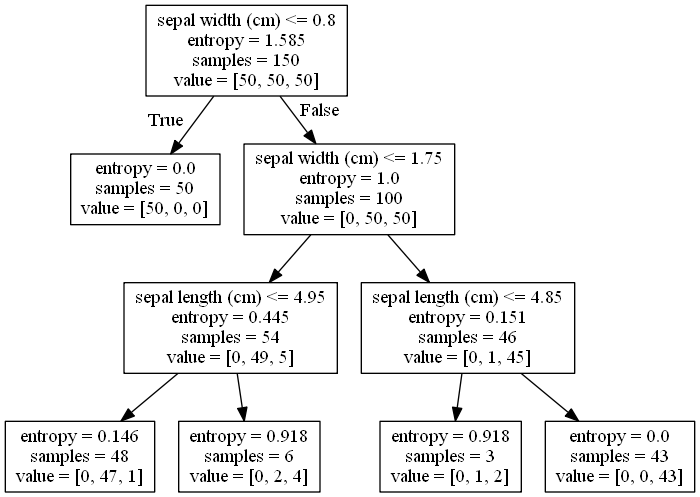

In [66]:
draw_decision_tree(tree3)

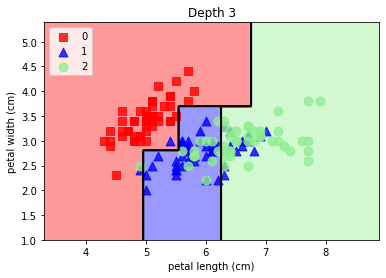

In [67]:
plot_decision_regions(X, y, tree1, "Depth 3")
plt.show()

In [70]:
confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 2, 34, 14],
       [ 1, 12, 37]], dtype=int64)

In [71]:
print(classification_report(y,tree1.predict(X)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       0.74      0.68      0.71        50
           2       0.73      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.80      0.81      0.80       150
weighted avg       0.80      0.81      0.80       150



In [80]:
# 교차검증
from sklearn.model_selection import KFold, cross_val_score

cv=KFold(5,shuffle=True,random_state=0)
tree1=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
cross_val_score(tree1,X,y,scoring="accuracy",cv=cv).mean()

0.6599999999999999

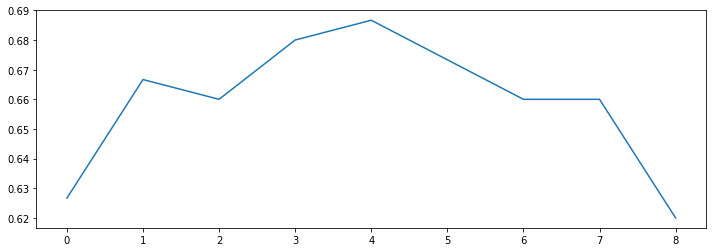

In [81]:
ls=[]
for depth in range(1,10):
    cv=KFold(5,shuffle=True,random_state=0)
    model=DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    ls.append(cross_val_score(model,X,y,scoring="accuracy",cv=cv).mean())
    
plt.figure(figsize=(12,4))
plt.plot(ls)
plt.show()
    

### 타이타닉호 생존자 예측

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
feature_names =["pclass","age","sex"]
dfX=df[feature_names].copy()
dfy=df["survived"].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# categori의경우 다 더미변수화 해주어야함
# a인지 아닌지 b인지 아닌지 이런식으로 두가지 가지만 가지기 때문
dfX["sex"]=LabelEncoder().fit_transform(dfX["sex"])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [10]:
dfX["age"].fillna(dfX["age"].mean(),inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [14]:
from sklearn.preprocessing import LabelBinarizer
dfX2=pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),columns=['c1','c2','c3'],index=dfX.index)
dfX=pd.concat([dfX,dfX2],axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
X_train,X_test,y_train,y_test=train_test_split(dfX,dfy,test_size=0.25,random_state=0)

In [18]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5).fit(X_train,y_train)

In [32]:
import io
import pydot
from IPython.core.display import Image

In [24]:
from sklearn.tree import export_graphviz

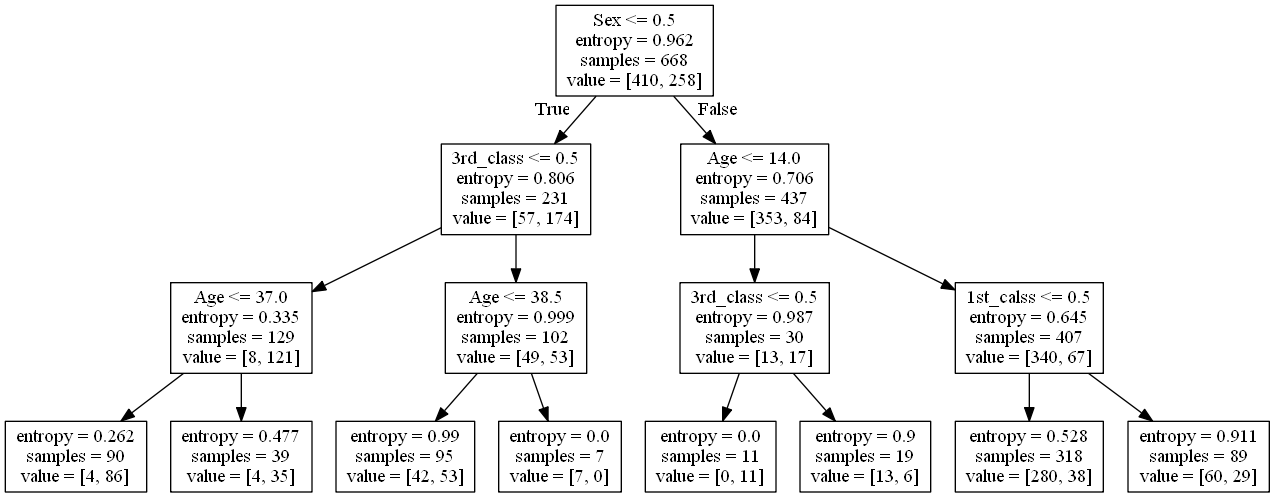

In [33]:
command_buf=io.StringIO()
export_graphviz(model,out_file=command_buf,feature_names=['Age','Sex','1st_calss','2nd_class','3rd_class'])
graph=pydot.graph_from_dot_data(command_buf.getvalue())[0]
image=graph.create_png()
Image(image)

In [34]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]], dtype=int64)

In [35]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]], dtype=int64)

In [36]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668



#### 연습 문제 3
```
MINIST digit 이미지 분류 문제를 의사결정나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.
```

In [37]:
# 특정위치의 픽셀이 0인지 1인지 보고 숫자를 맞추는 형식이 됨
# 오버피팅이 발생함 -> 다른그림이 들어오면 prediction이 안됨

### Greedy 의사 결정
```
의사결정나무의 문제점 중 하나는 특징의 선택이 greedy한 방식으로 이루어지기 때문에 
선택된 특징이 최적의 선택이 아닐 수도 있다는 점이다. 
예를 들어 데이터가 다음과 같다고 하자.
```

In [38]:
X = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 1],
    [1, 1, 1],
]
y = [0,0,1,1,1,1,0,0]

In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2).fit(X, y)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, 
                feature_names=["X1", "X2", "X3"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()

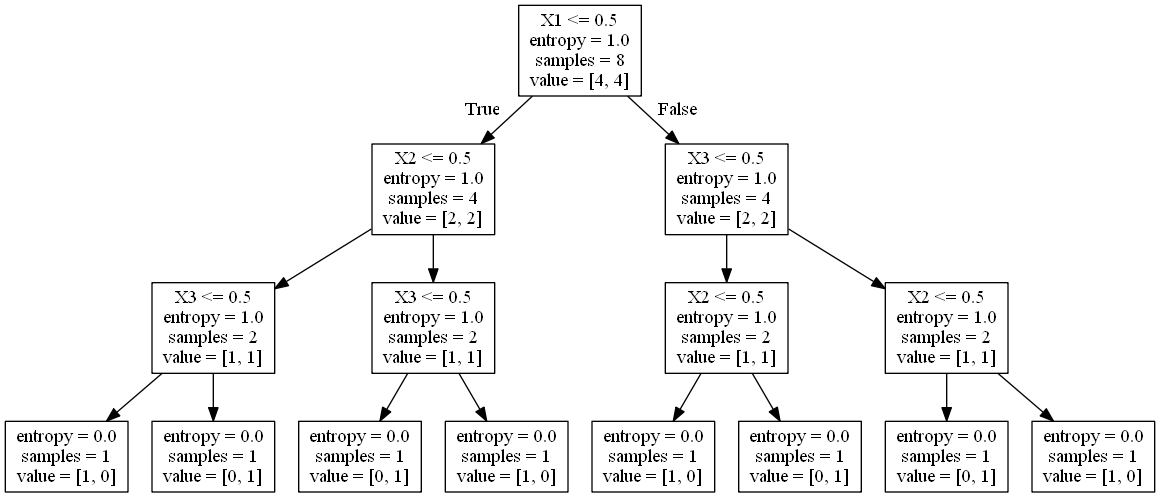

In [41]:
Image(image)

```
첫 특징으로  x1 이 아니라  x3 를 선택하면 2번째 단계에서  x2 를 선택함으로써 2단계만에 완벽한 분류를 할 수 없다.
하지만 이후의 상황을 첫 노드에서 특징을 결정할 때는 알 수 없다.
```

회귀 나무
```
예측값  y^ 을 다음처럼 각 특징값 영역마다 고정된 값  y1,y2 를 사용하고,

y^={y1 if x≥xthreshold 
   {y2 if x<xthreshold

기준값 및  y1,y2 를 선택하는 목적함수로 오차 제곱합을 사용하면 회귀분석를 할 수 있다. 이러한 모형을 회귀 나무(regression tree)라고 한다.
```

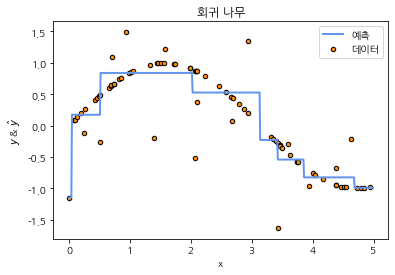

In [45]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="데이터")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="예측")
plt.xlabel("x")
plt.ylabel(r"$y$ & $\hat{y}$")
plt.title("회귀 나무")
plt.legend()
plt.show()

In [46]:
# 구간마다 y값을 지정